In [1]:
%load_ext autoreload
%cd ..

/Users/trippgordon/Desktop/Code/sonic/NoisyGAN


In [3]:
%autoreload 2
%reload_ext autoreload
!pwd
from core import *
import gin
gin.enter_interactive_mode()

/Users/trippgordon/Desktop/Code/sonic/NoisyGAN


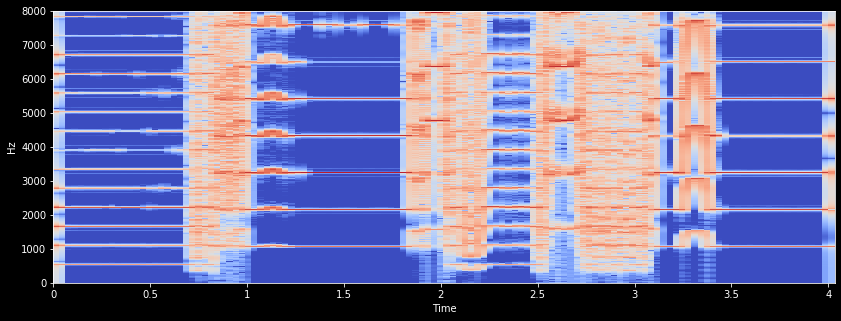

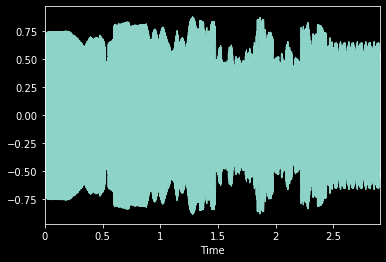

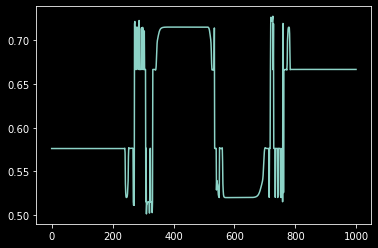

In [28]:
gan_model = GAN()
sample = gan_model.gen.generate()
play(sample['audio'])
specPlot(sample['audio'])
# wavePlot(sample['audio'])
# plt.plot(gan_model.gen.latent_generator(None)['f0_scaled'][0])

In [34]:
batch_size = 8

# data_provider = FromTFRecords('./Data/test/acapella.tfrecord*')
data_provider = FromTFRecords('./Data/piano/piano30s.tfrecord*')
combined_iter = combined_sample_iter(gan_model.gen, data_provider, batch_size=batch_size)
opt = tf.keras.optimizers.Adam()


In [36]:
train_gan(gan_model, opt, combined_iter,model_dir="junk", total_iters=2,audio_period=1)

INFO:absl:----- GAN Step 0 -----
INFO:absl:Disc Loss: 6.0093594
INFO:absl:Gen Loss: 11.134726


INFO:absl:----- GAN Step 1 -----
INFO:absl:Disc Loss: 7.93917
INFO:absl:Gen Loss: 11.1526165


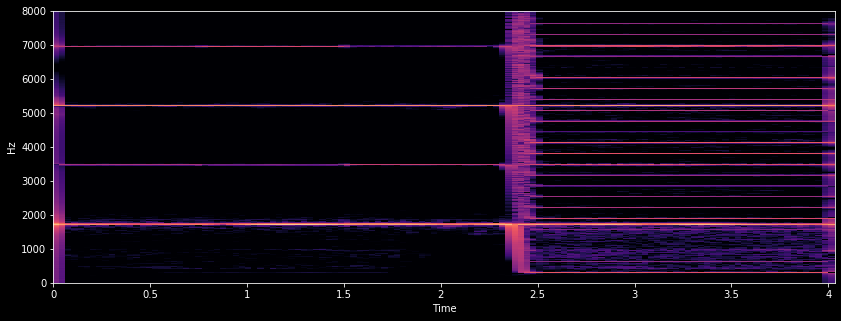

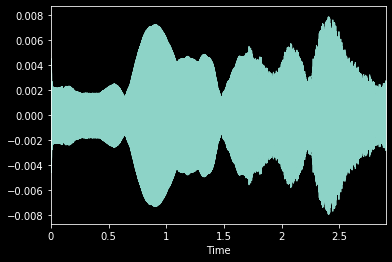

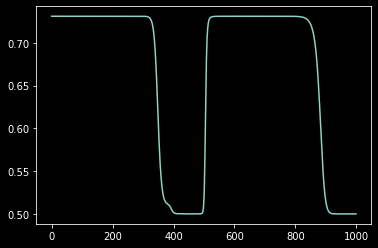

In [31]:
sample = gan_model.gen.generate()
play(sample['audio'])
specPlot(sample['audio'])
wavePlot(sample['audio'])
plt.plot(gan_model.gen.latent_generator(None)['f0_scaled'][0])